# Exploratory Data Analysis – E-Commerce Fraud Dataset

## Objective
This notebook explores the e-commerce fraud dataset to understand data quality,
class imbalance, transaction patterns, and potential fraud indicators.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


df = pd.read_csv("../data/raw/Fraud_Data.csv")
df.head()


In [17]:
df = pd.read_csv("../data/raw/Fraud_Data.csv")
df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [18]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


We inspect data types, missing values, and summary statistics to assess data quality.


In [19]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

Missing values are minimal and handled during preprocessing. Duplicate records are removed.


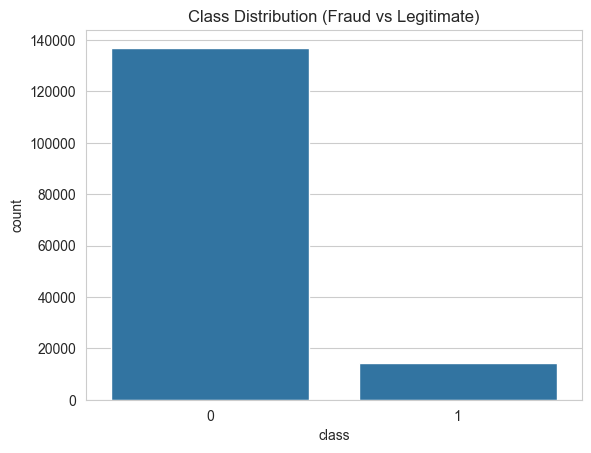

In [20]:
df["class"].value_counts(normalize=True)
sns.countplot(x="class", data=df)
plt.title("Class Distribution (Fraud vs Legitimate)")
plt.show()


The dataset is highly imbalanced, which motivates the use of specialized evaluation
metrics and resampling techniques.


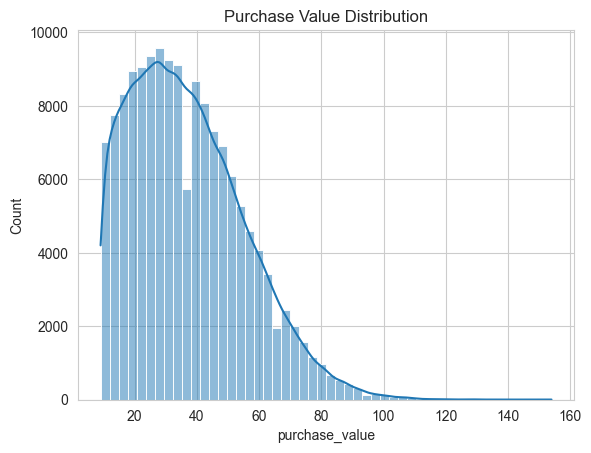

In [21]:
sns.histplot(df["purchase_value"], bins=50, kde=True)
plt.title("Purchase Value Distribution")
plt.show()


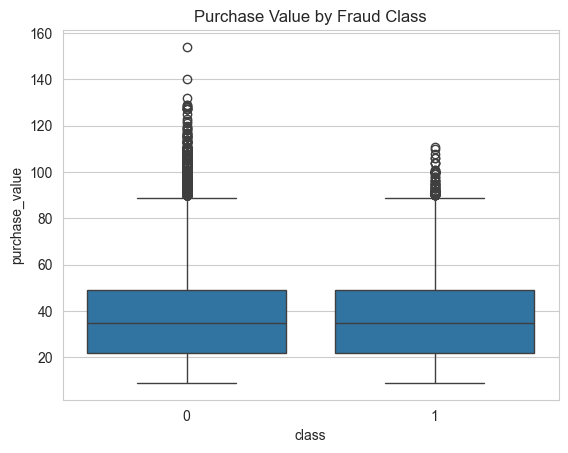

In [22]:
sns.boxplot(x="class", y="purchase_value", data=df)
plt.title("Purchase Value by Fraud Class")
plt.show()


In [23]:
df["signup_time"] = pd.to_datetime(df["signup_time"])
df["purchase_time"] = pd.to_datetime(df["purchase_time"])

df["time_since_signup"] = (
    df["purchase_time"] - df["signup_time"]
).dt.total_seconds() / 3600


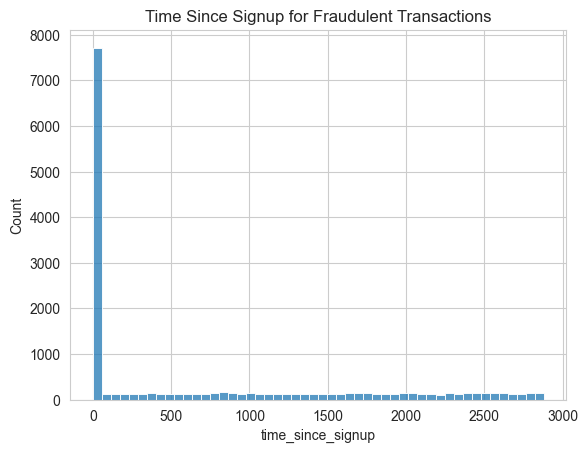

In [24]:
sns.histplot(df[df["class"] == 1]["time_since_signup"], bins=50)
plt.title("Time Since Signup for Fraudulent Transactions")
plt.show()


## Key Insights
- Severe class imbalance is present
- Fraud tends to occur shortly after signup
- Purchase value shows different distributions for fraud vs legitimate transactions
